In [ ]:
import cv2 as cv
import numpy as np
im = cv.imread(r'./Images/sudoku.png',cv.IMREAD_COLOR)
assert im is not None

gray =cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(im,cv.COLOR_BGR2GRAY)
lines = cv.HoughLines

In [4]:
import cv2 as cv
import numpy as np

img = cv.imread(r'./Images/coins.jpg',cv.IMREAD_COLOR)
assert im is not None

gray =cv.cvtColor(im,cv.COLOR_BGR2GRAY)



circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,
                            param1=50,param2=30,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
import cv2 as cv
import numpy as np

im=cv.imread(r'./Images/pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
templ=cv.imread(r'./Images/templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(im,50,250)
templ_edges = cv.Canny(templ,50,250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im,cv.COLOR_BAYER_BG2BGR)
for x, y ,scale, orientation in positions[0]:
    halfHeight = templ.shape[0]/2*scale
    halfWidth = templ.shape[1]/2*scale
    p1=(int(x-halfWidth),int(y-halfHeight))
    p2=(int(x+halfWidth),int(y+halfHeight))
    print("x={},y={},scale={},orientation={},p1={},p2={}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0.0,255))

    

TypeError: 'NoneType' object is not subscriptable

TypeError: 'AxesSubplot' object is not subscriptable

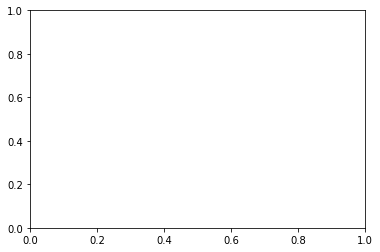

In [14]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

theta =np.pi*30/180
s=1
tx,ty = 1.5,2.2
H=np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
Y = H @ X
a11,a12,a21,a22 = 0.8,1.2,0.7,1.5
A = np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])


x=np.append(X[0,:],X[0,0])
y =np.append(X[1,:],X[1,0])

fig,ax =plt.subplots(1,1)
ax[0].plot(x,y,color='g')
ax[0].set_aspect('equal')



x=np.append(Y[0,:],Y[0,0])
y =np.append(Y[1,:],Y[1,0])

fig,ax =plt.subplots(1,1)
ax[0].plot(x,y,color='g')
ax[0].set_aspect('equal')
plt.show()


In [ ]:
import cv2 as cv
import numpy as np

im1 = cv.imread(r'./Images/img1.ppm',cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'./Images/img4.ppm',cv.IMREAD_ANYCOLOR)

H = np.array
